### [데이터 확인](https://raw.githubusercontent.com/kim-juwan/koweps/main/Koweps_hpwc14_2019.csv?token=GHSAT0AAAAAACBGH73WOWETG4BV5W2GA3ICZBTL2IA)
* 한국복지패털 데이터는 한국보건사회연구원에서 우리나라 가구의 경제활동을 연구해 복지정책에 반영할 목적으로 발간하는 조사 자료
* 2006년부터 매년 전국에서 7,000여 가구를 선정해 경제활동, 생활실태, 복지욕구 등 조사하여 여러 변수로 제공되고 있다.
* 위 데이터는 2019년 데이터로 6,331가구, 14,418명의 정보를 담고 있다.
* *변수 설명 (Codebook 참고)*
    - gender : 성별
    - birth : 태어난 해
    - marriage_type : 결혼, 이혼 여부
    - religion : 종교 여부
    - imcome : 월수입, 한달 임금, 월급
    - code_job : 직업 코드
    - code_region : 지역 코드

In [1]:
# 그래프 크기 조절
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,2)
# 한글 폰트 적용
from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)

In [3]:
import pandas as pd

welfare = pd.read_csv('../data/Koweps_hpwc14_2019.csv')
welfare.head()

,gender,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0


* 3.2.1. 성별에 따른 임금 차이가 날까? (남녀 임금이 다를까?)
* 3.2.2. 나이에 따라 임금 차이가 날까? (임금이 가장 높은 나이가 언제일까?)
* 3.2.3. 나이에 따라 임금 차이가 날까? (어느 나이대가 임금이 높을까?)
* 3.2.4. 성별과 연령대에 따라 임금 차이가 날까? (남녀 임금의 차이가 연령대에 따라 차이가 있을까?)
* 3.2.5. 지역에 따라 임금 차이가 날까? (수도권이 비수도권보다 임금이 높을까?)
* 3.2.6. 남여에 따라 선호 직업에 차이가 날까? (남녀별로 어떤 직업이 선호도가 높을까?)
* 3.2.7. 종교 유무에 따른 이혼율의 차이가 날까? (종교가 있으면 가정사에 문제가 있을까?)

In [4]:
# 사전 범주나누기 작업
# welfare['gender'].apply(lambda x : '남자' if x == 1 else '여자')
def gender_convert(x):
    if x == 1:
        return '남자'
    else:
        return '여자'
welfare['gender2'] = welfare['gender'].apply(gender_convert)
welfare.head()

,gender,birth,marriage_type,religion,income,code_job,code_region,gender2
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,여자
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,남자
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,남자
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,남자
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0,여자


In [5]:
# welfare['birth'] > 'age'
welfare['age'] = 2019 - welfare['birth']
welfare.head()

,gender,birth,marriage_type,religion,income,code_job,code_region,gender2,age
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,여자,74.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,남자,71.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,남자,77.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,남자,57.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0,여자,56.0


In [6]:
def age_convert(x):
    if x <= 19:
        return 'teenager'
    elif x <= 40:
        return 'young'
    elif x <= 65:
        return 'senior'
    else:
        return 'old'
    
welfare['age_group'] = welfare['age'].apply(age_convert)
welfare.head()

,gender,birth,marriage_type,religion,income,code_job,code_region,gender2,age,age_group
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,여자,74.0,old
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,남자,71.0,old
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,남자,77.0,old
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,남자,57.0,senior
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0,여자,56.0,senior


In [7]:
# 3.2.1. 성별에 따른 임금 차이가 날까? (남녀 임금이 다를까?)
welfare.groupby(['gender2', 'age_group'])['income'].mean()

gender2  age_group
남자       old          127.028112
         senior       414.332013
         teenager     156.750000
         young        314.990956
여자       old           59.756219
         senior       208.534949
         teenager      87.666667
         young        221.883963
Name: income, dtype: float64

C:\Users\KEI\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='gender2', ylabel='income'>

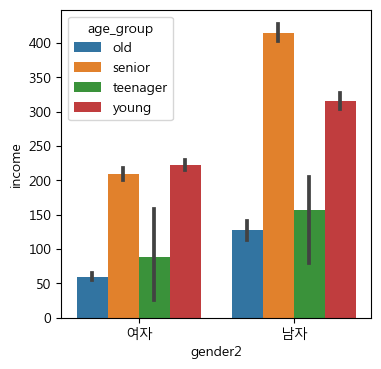

In [8]:
import seaborn as sns
# 막대그래프 (평균 비교)
plt.figure(figsize=(4,4))
sns.barplot(data = welfare, x = 'gender2', y = 'income', hue = 'age_group')

C:\Users\KEI\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='age_group', ylabel='income'>

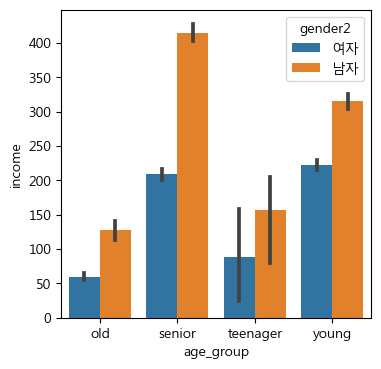

In [9]:
plt.figure(figsize=(4,4))
sns.barplot(data = welfare, x = 'age_group', y = 'income', hue = 'gender2')

In [11]:
welfare.groupby(['gender2', 'age_group'])['income'].groups[('여자', 'old')]

Index([    0,     7,     8,    12,    19,    21,    37,    45,    50,    52,
       ...
       14384, 14391, 14393, 14395, 14397, 14400, 14405, 14406, 14408, 14409],
      dtype='int64', length=2881)

In [12]:
# 집단 나누고 정규성 독립성 등분산성
m_young = welfare.groupby(['gender2', 'age_group'])['income'].get_group(  ('남자', 'young')   )
f_young = welfare.groupby(['gender2', 'age_group'])['income'].get_group(  ('여자', 'young')   )

In [13]:
from scipy import stats

print(stats.shapiro(m_young.dropna()))
print(stats.shapiro(f_young.dropna()))

ShapiroResult(statistic=0.894019365310669, pvalue=1.175439983014034e-22)
ShapiroResult(statistic=0.9306203126907349, pvalue=2.282513703677546e-18)


In [14]:
stats.mannwhitneyu(m_young.dropna(), f_young.dropna())

MannwhitneyuResult(statistic=418719.0, pvalue=2.8767318252485324e-44)

<Axes: xlabel='age', ylabel='income'>

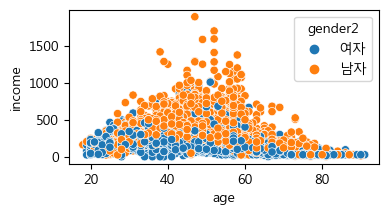

In [15]:
# hue : 범주형
# 성별(범주)과 나이(수치)와 임금(수치)

sns.scatterplot(data = welfare, x = 'age', y = 'income', hue = 'gender2')

<Axes: xlabel='age', ylabel='income'>

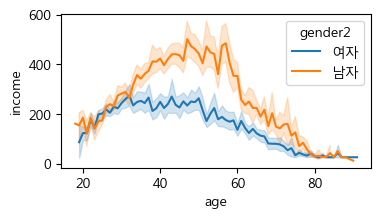

In [16]:
sns.lineplot(data = welfare, x = 'age', y = 'income', hue = 'gender2')

* 3.2.5. 지역에 따라 임금 차이가 날까? (수도권이 비수도권보다 임금이 높을까?)


In [17]:
def region_convert(x):
    if x <= 2:
        return '수도권'
    else:
        return '비수도권'
welfare['region'] = welfare['code_region'].apply(region_convert)
welfare.head()

,gender,birth,marriage_type,religion,income,code_job,code_region,gender2,age,age_group,region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,여자,74.0,old,수도권
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,남자,71.0,old,수도권
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,남자,77.0,old,수도권
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,남자,57.0,senior,수도권
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0,여자,56.0,senior,수도권


In [18]:
c_income = welfare[welfare['region'] == '수도권']['income'].dropna()
nc_income = welfare[welfare['region'] == '비수도권']['income'].dropna()

print(stats.shapiro(c_income))
print(stats.shapiro(nc_income))

ShapiroResult(statistic=0.8556293845176697, pvalue=3.9598172264583546e-39)
ShapiroResult(statistic=0.8847554922103882, pvalue=4.070659934986448e-40)


In [19]:
stats.mannwhitneyu(c_income, nc_income)

MannwhitneyuResult(statistic=2693902.5, pvalue=0.00010044798958351874)

<Axes: xlabel='region', ylabel='income'>

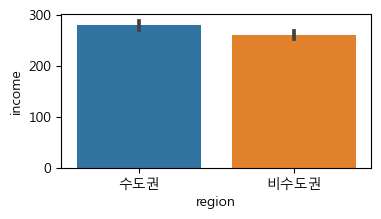

In [20]:
sns.barplot(data = welfare, x = 'region', y = 'income')

* 3.2.7. 종교 유무에 따른 이혼율의 차이가 날까? (종교가 있으면 가정사에 문제가 있을까?)

In [21]:
# 결혼유무
def marriage_convert(x):
    if (x == 0) or (x == 5):
        return '미혼'
    elif x == 1:
        return '기혼'
    elif (x == 2) or (x == 4) or (x == 6):
        return '기타'
    else:
        return '이혼'
    
    
welfare['marriage'] = welfare['marriage_type'].apply(marriage_convert)
welfare.head()

,gender,birth,marriage_type,religion,income,code_job,code_region,gender2,age,age_group,region,marriage
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,여자,74.0,old,수도권,기타
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,남자,71.0,old,수도권,기타
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,남자,77.0,old,수도권,이혼
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,남자,57.0,senior,수도권,기혼
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0,여자,56.0,senior,수도권,기혼


In [23]:
# 카이제곱 - crosstab
table = pd.crosstab(welfare['religion'], welfare['marriage'])[['기혼', '이혼']]
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=5.6769927793878825, pvalue=0.01718880447200066, dof=1, expected_freq=array([[3499.63827897,  335.36172103],
       [3690.36172103,  353.63827897]]))

<Axes: xlabel='religion', ylabel='count'>

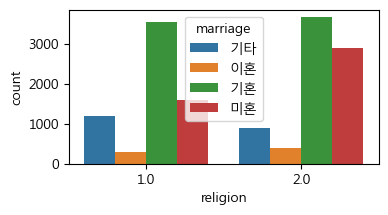

In [24]:
sns.countplot(data = welfare, x = 'religion', hue = 'marriage')

* 3.2.6. 남여에 따라 선호 직업에 차이가 날까? (남녀별로 어떤 직업이 선호도가 높을까?)
* 선호 - 빈도수가 높은

In [25]:
code_job = pd.read_csv('../data/Koweps_code_job_2019.csv', encoding='euc-kr')
welfare = welfare.merge(code_job, on = 'code_job', how='left')

In [51]:
male = welfare.groupby('gender2').get_group('남자').value_counts('job').head(10)
male

job
작물 재배 종사자         486
자동차 운전원           230
경영 관련 사무원         216
매장 판매 종사자         142
영업 종사자            113
청소원 및 환경미화원       109
건설 및 광업 단순 종사자     96
제조 관련 단순 종사자       80
건물 관리원 및 검표원       79
행정 사무원             74
Name: count, dtype: int64

In [52]:
female = welfare.groupby('gender2').get_group('여자').value_counts('job').head(10)
female

job
작물 재배 종사자           476
청소원 및 환경미화원         282
매장 판매 종사자           212
회계 및 경리 사무원         163
돌봄 및 보건 서비스 종사자     155
제조 관련 단순 종사자        148
음식 관련 단순 종사자        126
식음료 서비스 종사자         117
조리사                 114
기타 서비스 관련 단순 종사자     97
Name: count, dtype: int64

<BarContainer object of 10 artists>

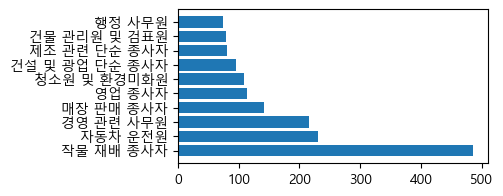

In [57]:
plt.barh(y = male.index, width= male.values)

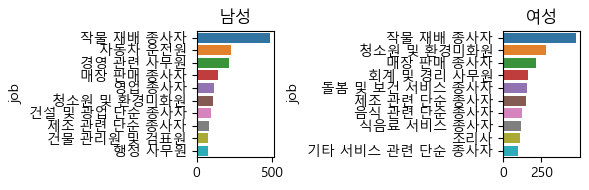

In [60]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
sns.barplot(x = male.values, y = male.index)
plt.title('남성')
plt.subplot(1,2,2)
sns.barplot(x = female.values, y = female.index)
plt.title('여성')
plt.tight_layout()

* 해당 직업 코드
    - 자동차 운전원 : 873
    - 경영 관련 사무원 : 312
    - 영업 종사자 : 510
    - 청소원 및 환경미화원 : 941
    - 회계 및 경리 사무원 : 313
    - 돌봄 및 보건 서비스 종사자 : 421

In [62]:
jobs = welfare[welfare['code_job'].isin([873, 312, 510, 941, 313, 421])]

<Axes: xlabel='income', ylabel='job'>

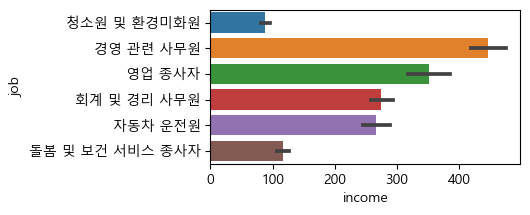

In [65]:
# jobs['job'] : 범주형   jobs['income'] : 수치형 차이 확인
sns.barplot(data = jobs, y = 'job', x = 'income')

In [90]:
# 작물 재배 종사자(611), 매장 판매 종사자(521) > 얘네의 데이터만 가져와서
# 성별에 따른 임금차이 다시 분석
job2 = welfare[welfare['code_job'].isin([611,521])]

In [91]:
male = job2[job2['gender2'] == '남자']['income'].dropna()
female = job2[job2['gender2'] == '여자']['income'].dropna()

In [92]:
print(stats.shapiro(male))
print(stats.shapiro(female))

ShapiroResult(statistic=0.9640111923217773, pvalue=0.06237751245498657)
ShapiroResult(statistic=0.9395403861999512, pvalue=0.00010531576845096424)


In [93]:
stats.mannwhitneyu(male, female)

MannwhitneyuResult(statistic=4757.5, pvalue=7.650929066198753e-06)

<Axes: xlabel='gender2', ylabel='income'>

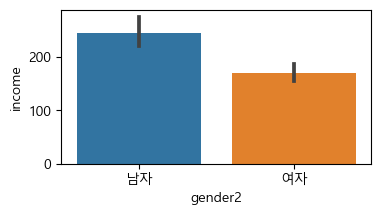

In [94]:
sns.barplot(data = job2, x = 'gender2', y = 'income')

In [95]:
# 만약에 모수검정이라고 했으면
# male, female 집단이 독립성 가진다.
# ttest_ind > 등분산성(bartlett, levene, fligner)
print(stats.bartlett(male, female))
print(stats.levene(male, female))
print(stats.fligner(male, female))

BartlettResult(statistic=6.753489492719074, pvalue=0.00935645199333627)
LeveneResult(statistic=6.056500967168098, pvalue=0.014866196165702976)
FlignerResult(statistic=6.610651718069066, pvalue=0.01013705557082485)


In [96]:
# 등분산성 X
stats.ttest_ind(male, female, equal_var=False)

TtestResult(statistic=4.568366080800213, pvalue=1.3665687859919496e-05, df=103.11887001101243)